In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import mlflow
import mlflow.sklearn
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Loading

In [132]:
df = pd.read_csv('./data/Loan_Default.csv')


In [133]:
#describing dataset
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [134]:
##understanding column types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [135]:
## finding missing values. 

df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

<Axes: xlabel='Status'>

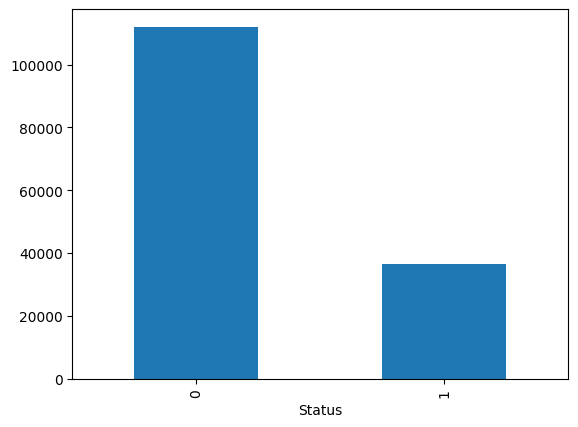

In [136]:
## checking if the dataset is imbalanced for target variable, which turn outs to be true


df['Status'].value_counts().plot(kind='bar')

## Splitting dataset

In [137]:
Y=df['Status']
X=df.drop(columns=['Status','ID'])
X_test,X_train, Y_test, Y_train = train_test_split(X,Y,test_size=0.3, random_state=42)

X_test.shape, Y_test.shape, X_train.shape,Y_train.shape

((104069, 32), (104069,), (44601, 32), (44601,))

## Data-PreProcessing and Cleaning - Training Test

In [138]:
X_train.isna().sum()

year                             0
loan_limit                    1007
Gender                           0
approv_in_adv                  292
loan_type                        0
loan_purpose                    31
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             10848
Interest_rate_spread         10914
Upfront_charges              11830
term                            13
Neg_ammortization               35
interest_only                    0
lump_sum_payment                 0
property_value                4482
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        2669
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                             66
submission_of_application       66
LTV                 

In [139]:
categorical_columns = X_train.select_dtypes(include='object').columns
numerical_columns = X_train.select_dtypes(exclude='object').columns

categorical_columns, numerical_columns

(Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
        'Credit_Worthiness', 'open_credit', 'business_or_commercial',
        'Neg_ammortization', 'interest_only', 'lump_sum_payment',
        'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
        'credit_type', 'co-applicant_credit_type', 'age',
        'submission_of_application', 'Region', 'Security_Type'],
       dtype='object'),
 Index(['year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
        'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
        'LTV', 'dtir1'],
       dtype='object'))

## Visualizations

In [140]:
X_train[numerical_columns].head(10)

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
24912,2019,116500,4.990,1.4474,2463.12,360.0,138000.0,1740.0,679,84.420290,41.0
147068,2019,236500,3.990,0.4417,2517.59,360.0,268000.0,5880.0,853,88.246269,44.0
123284,2019,136500,3.990,0.4522,3900.00,348.0,708000.0,2340.0,598,19.279661,41.0
53610,2019,256500,4.250,0.6220,3437.50,180.0,708000.0,5640.0,776,36.228814,32.0
39672,2019,686500,3.375,-0.2241,0.00,360.0,838000.0,7140.0,653,81.921241,48.0
4656,2019,286500,3.690,-0.0084,0.00,360.0,758000.0,4800.0,855,37.796834,36.0
38443,2019,566500,4.000,0.0554,5630.00,360.0,758000.0,7620.0,514,74.736148,32.0
89423,2019,286500,3.375,0.1312,2887.18,360.0,308000.0,7860.0,890,93.019481,31.0
41909,2019,266500,4.125,0.4472,2597.50,360.0,388000.0,4800.0,667,68.685567,37.0
57290,2019,136500,3.625,0.8731,3901.00,240.0,228000.0,4200.0,541,59.868421,23.0


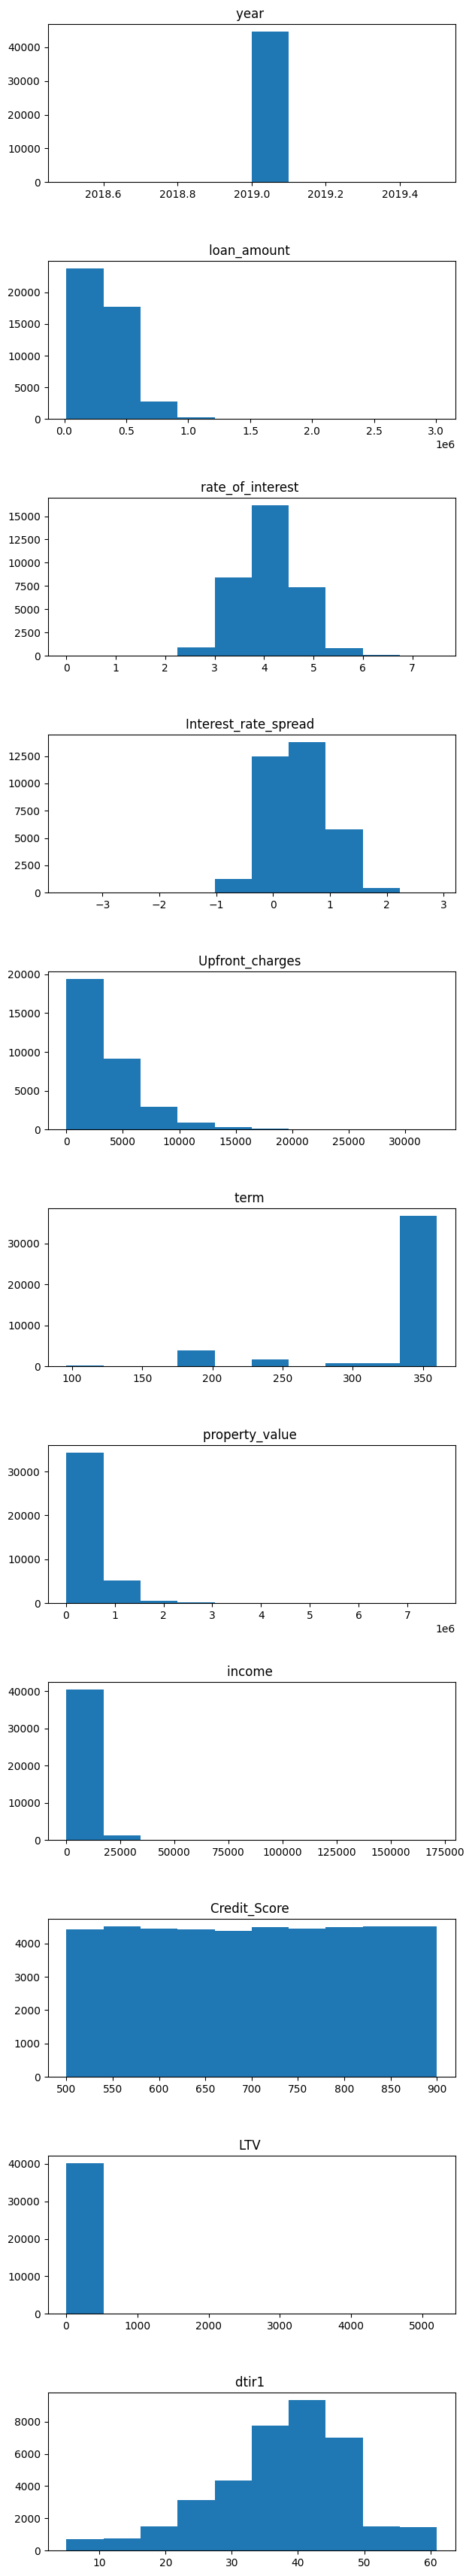

In [141]:


fig, axes = plt.subplots(len(X_train[numerical_columns].columns),1, figsize=(7,40))

for i,column in enumerate(X_train[numerical_columns].columns):
    
    # histogram    
    axes[i].hist(X_train[column])
    axes[i].set_title(f"{column} ")



plt.subplots_adjust(top=0.95, hspace=0.5)
plt.show()

## Imputation and Encoding

In [142]:
## imputation and encoding steps for category variables
cat_steps = [
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("onehotencoder",OneHotEncoder())
]

cat_pipeline = Pipeline(cat_steps)

In [143]:
## imputation and encoding steps for numerical variables
num_steps = [
    ("imputer",SimpleImputer(strategy="median")),
    ("standardscaler",StandardScaler())
]
num_pipeline = Pipeline(num_steps)

In [144]:
transformer = ColumnTransformer(
    transformers=[
        ("num_pipeline", num_pipeline, numerical_columns),
        ("cat_pipeline", cat_pipeline, categorical_columns)
    ]
)

In [145]:
X_train_trans = transformer.fit_transform(X_train)
X_test_trans  = transformer.transform(X_test)

## Checking Multi-Coliniarity 

In [146]:
X_train_trans.shape, Y_train.shape

((44601, 70), (44601,))

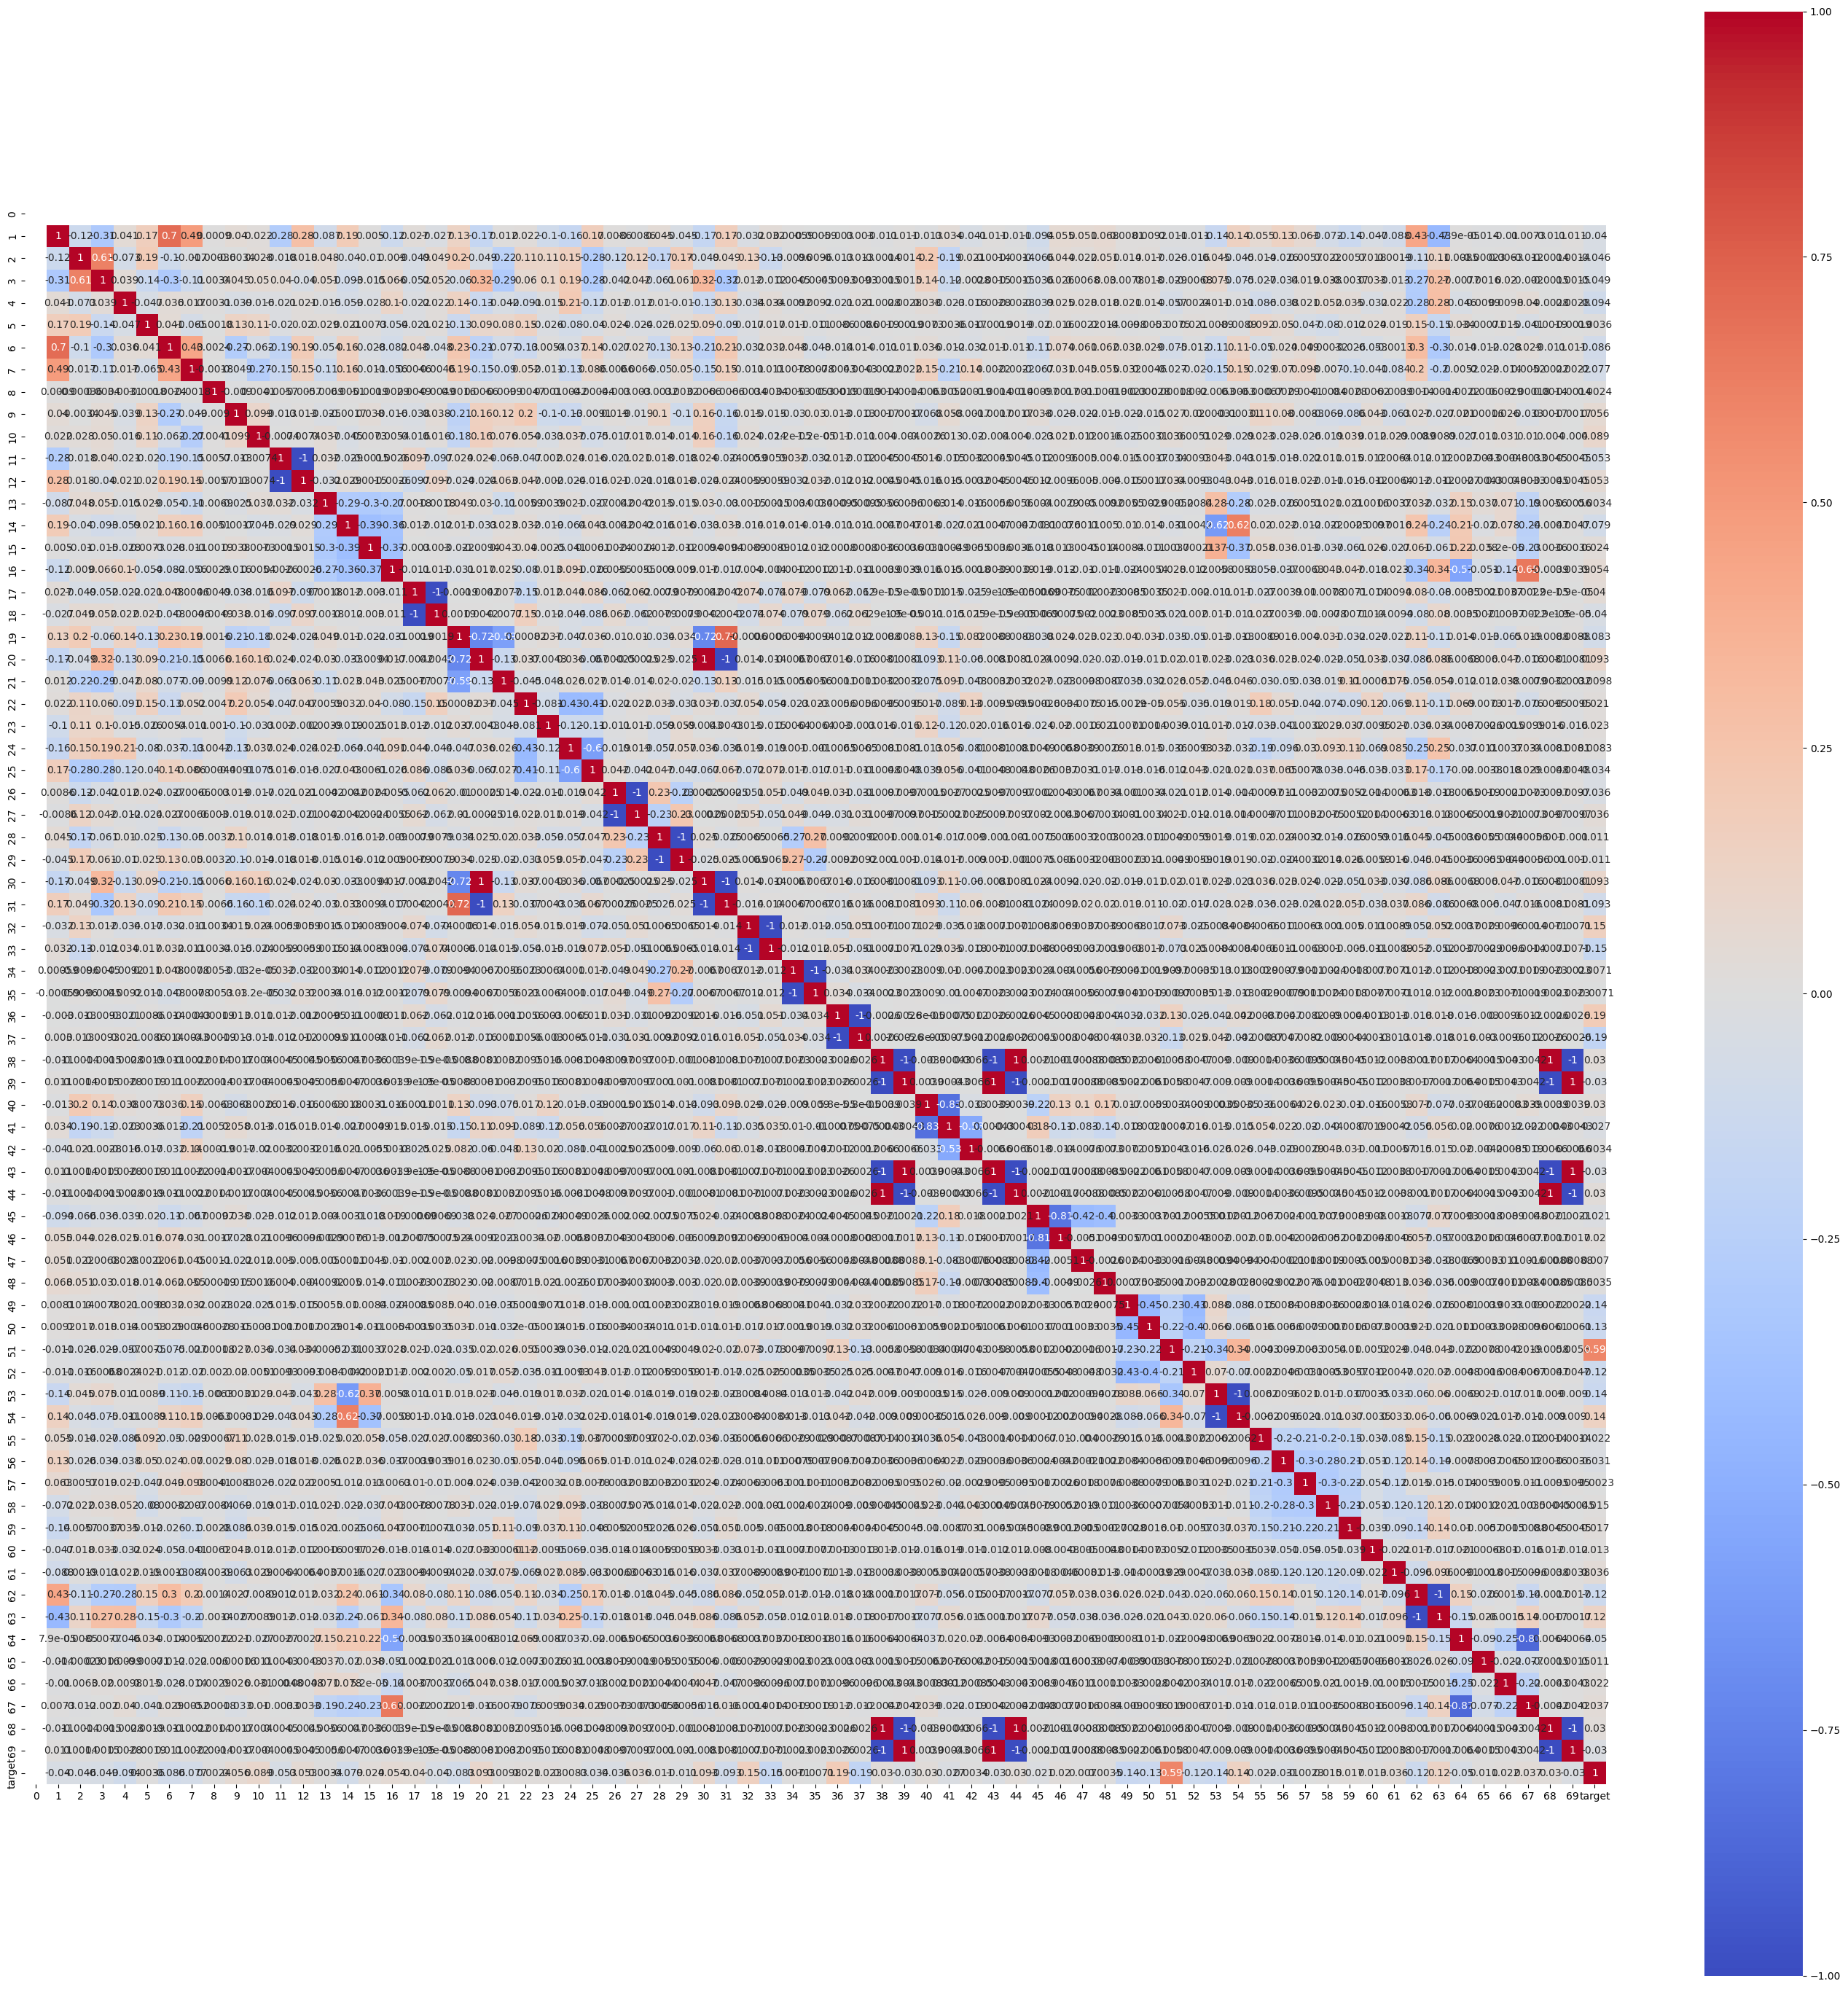

In [147]:
Y_train = Y_train.to_numpy()[:, np.newaxis]
Y_train_df = pd.DataFrame(Y_train, columns=['target'])
corr_matrix = pd.concat([pd.DataFrame(X_train_trans),Y_train_df],axis=1).corr()

plt.figure(figsize=(35,35))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)
plt.show()

In [148]:
#collnearity search
target_variable='target'
threshold = 0.1
collinear_variables = set()
for i in range(len(corr_matrix.columns)):
    if(corr_matrix.columns[i]=='target'):
        for j in range(len(corr_matrix.columns)):
            if( i != j and (abs(corr_matrix.iloc[i,j])>threshold)):
                collinear_variables.add(corr_matrix.columns[i])
                collinear_variables.add(corr_matrix.columns[j])
       
    
collinear_variables.remove(target_variable)  
collinear_variables

{32, 33, 36, 37, 49, 50, 51, 52, 53, 54, 62, 63}

<Axes: xlabel='target'>

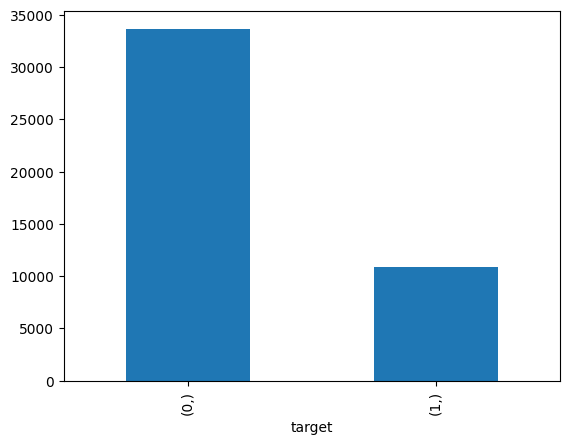

In [149]:
Y_train_df.value_counts().plot(kind='bar')

## oversampling

In [150]:
adasyn = ADASYN(random_state=42)
X_train_res, Y_train_res = adasyn.fit_resample(X_train_trans, Y_train_df)

X_train_res.shape, Y_train_res.shape

((66863, 70), (66863, 1))

<Axes: xlabel='target'>

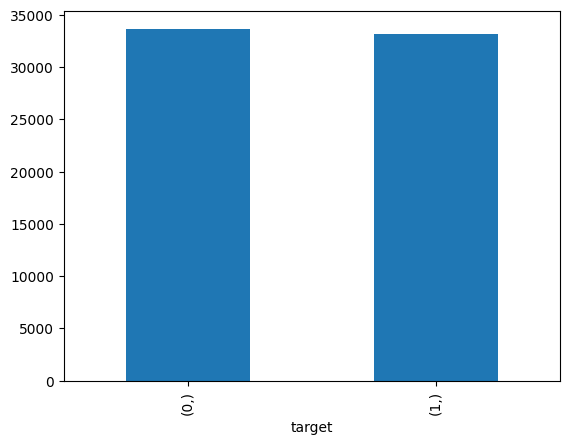

In [151]:
Y_train_res.value_counts().plot(kind='bar')

In [152]:


X_train_res_df = pd.DataFrame(X_train_res)
Y_train_res_df = pd.DataFrame(Y_train_res)

X_test_res_df = pd.DataFrame(X_test_trans)

#taking columns with threshold value 
X_train_res_df_ex = X_train_res_df[list(collinear_variables)]
X_test_trans_ex = X_test_res_df[list(collinear_variables)]

In [153]:
 X_test_trans_ex

,32,33,36,37,49,50,51,52,53,54,62,63
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104064,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
104065,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
104066,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
104067,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## MLFlow Setup

In [154]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.set_experiment("Loan Default ML Model Tracking")



<Experiment: artifact_location='mlflow-artifacts:/348484844709376534', creation_time=1723795066617, experiment_id='348484844709376534', last_update_time=1723795066617, lifecycle_stage='active', name='Loan Default ML Model Tracking', tags={}>

## Modeling

In [155]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machines': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Perceptron': Perceptron(),
    'Ridge Classifier': RidgeClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Bagging Classifier': BaggingClassifier()
    
}

In [156]:

with mlflow.start_run():
    max_f1_score=0
    model_name = ''
    best_model = None

    X_test_trans = pd.DataFrame(X_test_trans)
    for key,model in classifiers.items():
        
        model.fit(X_train_res_df_ex,Y_train_res_df.values.ravel())
        pred=model.predict(X_test_trans_ex)
        input_example = X_train_res_df_ex.iloc[[0]]
        print(f"{key}: {model}")
        mlflow.sklearn.log_model(model,f"model-{key}",input_example=input_example)
        
        accuracy = accuracy_score(Y_test, pred)
        print(accuracy)
        mlflow.log_metric("accuracy", accuracy)

        temp_score = f1_score(Y_test, pred)
        print(temp_score)
        mlflow.log_metric("f1-score", temp_score)

        classif_rept = classification_report(Y_test, pred, output_dict=True)

        precision = classif_rept['weighted avg']['precision']
        recall = classif_rept['weighted avg']['recall']

        print(classif_rept)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)

        conf_mat = confusion_matrix(Y_test, pred)
        print(conf_mat)
    

        mlflow.log_text(str(conf_mat), 'confusion_matrix')

        print(' ')
        if(temp_score > max_f1_score):
            max_f1_score = temp_score
            model_name = key
            best_model = model
            
    print(f"best model is {key} with {max_f1_score}")        

Logistic Regression: LogisticRegression(max_iter=1000)


d:\WorkSpace\LoanDefaultProject\venv\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


0.7142857142857143
0.5517262173978592
{'0': {'precision': 0.8829730240766419, 'recall': 0.7152685591749208, 'f1-score': 0.7903221256910753, 'support': 78344.0}, '1': {'precision': 0.4506341583548824, 'recall': 0.7112925170068027, 'f1-score': 0.5517262173978592, 'support': 25725.0}, 'accuracy': 0.7142857142857143, 'macro avg': {'precision': 0.6668035912157622, 'recall': 0.7132805380908618, 'f1-score': 0.6710241715444673, 'support': 104069.0}, 'weighted avg': {'precision': 0.7761024159157847, 'recall': 0.7142857142857143, 'f1-score': 0.7313431815209287, 'support': 104069.0}}
[[56037 22307]
 [ 7427 18298]]
 
Decision Trees: DecisionTreeClassifier()


d:\WorkSpace\LoanDefaultProject\venv\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


0.8533761254552268
0.6343660891860159
{'0': {'precision': 0.8581892097523308, 'recall': 0.9646303482079036, 'f1-score': 0.908302034193684, 'support': 78344.0}, '1': {'precision': 0.8268990504747626, 'recall': 0.5145578231292517, 'f1-score': 0.6343660891860159, 'support': 25725.0}, 'accuracy': 0.8533761254552268, 'macro avg': {'precision': 0.8425441301135468, 'recall': 0.7395940856685776, 'f1-score': 0.77133406168985, 'support': 104069.0}, 'weighted avg': {'precision': 0.850454539990774, 'recall': 0.8533761254552268, 'f1-score': 0.840587323902221, 'support': 104069.0}}
[[75573  2771]
 [12488 13237]]
 
Random Forest: RandomForestClassifier()


d:\WorkSpace\LoanDefaultProject\venv\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


0.8533761254552268
0.6343660891860159
{'0': {'precision': 0.8581892097523308, 'recall': 0.9646303482079036, 'f1-score': 0.908302034193684, 'support': 78344.0}, '1': {'precision': 0.8268990504747626, 'recall': 0.5145578231292517, 'f1-score': 0.6343660891860159, 'support': 25725.0}, 'accuracy': 0.8533761254552268, 'macro avg': {'precision': 0.8425441301135468, 'recall': 0.7395940856685776, 'f1-score': 0.77133406168985, 'support': 104069.0}, 'weighted avg': {'precision': 0.850454539990774, 'recall': 0.8533761254552268, 'f1-score': 0.840587323902221, 'support': 104069.0}}
[[75573  2771]
 [12488 13237]]
 
Support Vector Machines: SVC()


d:\WorkSpace\LoanDefaultProject\venv\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


MlflowException: API request to http://127.0.0.1:5000/api/2.0/mlflow/runs/get failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/get?run_uuid=00d932332fe24ae29eb72caf69b4ad46&run_id=00d932332fe24ae29eb72caf69b4ad46 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000021D94BFA990>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))